In [23]:
import tensorflow as tf
import pickle
from keras.preprocessing import image
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import os
import numpy as np
from sklearn.model_selection import train_test_split
import cv2 as cv

In [63]:
pickle_in = open("/home/karol/model_training_data/X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("/home/karol/model_training_data/y.pickle","rb")
y = pickle.load(pickle_in)

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [68]:
print(y_train.shape)

(8000, 1)


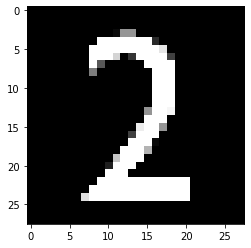

In [69]:
plt.figure()
plt.imshow(X_train[0], cmap='Greys')
plt.show()

In [35]:
IMG_SHAPE = X_train.shape[1:]

In [57]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=IMG_SHAPE))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [58]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
Total params: 55,744
Trainable params: 55,744
Non-trai

In [59]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [60]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=4, 
                    validation_data=(X_test,y_test))

Epoch 1/4
250/250 [==============================] - 2s 7ms/step - loss: 0.5348 - accuracy: 0.8406 - val_loss: 0.1153 - val_accuracy: 0.9670
Epoch 2/4
250/250 [==============================] - 2s 7ms/step - loss: 0.0968 - accuracy: 0.9705 - val_loss: 0.1015 - val_accuracy: 0.9730
Epoch 3/4
250/250 [==============================] - 2s 7ms/step - loss: 0.0496 - accuracy: 0.9851 - val_loss: 0.0480 - val_accuracy: 0.9875
Epoch 4/4
250/250 [==============================] - 2s 7ms/step - loss: 0.0290 - accuracy: 0.9898 - val_loss: 0.0337 - val_accuracy: 0.9885


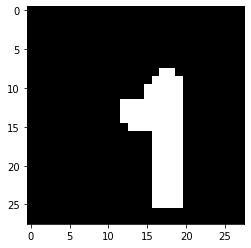

In [61]:
test_image = cv.imread("Box.png")
test_image = cv.resize(test_image,(20,20))
gray = cv.cvtColor(test_image, cv.COLOR_RGB2GRAY)
ret, thresh = cv.threshold(gray, 127, 255, cv.THRESH_BINARY)
plt.figure()
plt.imshow(thresh, cmap='Greys')
plt.show()

In [62]:
test_image = np.expand_dims(thresh, axis=0)
np.argmax(model.predict(test_image))

3